In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch

/Users/markviti/opt/anaconda3/envs/data/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Problem 1
### A

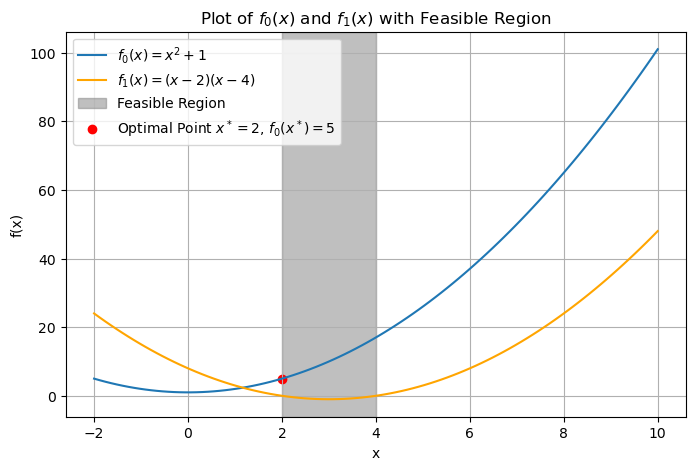

In [2]:
def f0(x):
    return x**2 + 1
def f1(x):
    return (x - 2)*(x - 4)

x = np.linspace(-2, 10, 100)
y0 = f0(x)
y1 = f1(x)

feasible_x = x[(x >= 2) & (x <= 4)]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y0, label='$f_0(x) = x^2 + 1$')
plt.plot(x, y1, label='$f_1(x) = (x-2)(x-4)$', color='orange')

# Highlight the region between 2 and 4
plt.axvspan(2, 4, color='grey', alpha=0.5, label='Feasible Region')

# Plot optimal point x = 2
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f_0(x)$ and $f_1(x)$ with Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

### B
We will first write out the Lagrange dual. The Lagrange dual is given by
$\begin{align}
L(x, \lambda) & = (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda)
\end{align}$

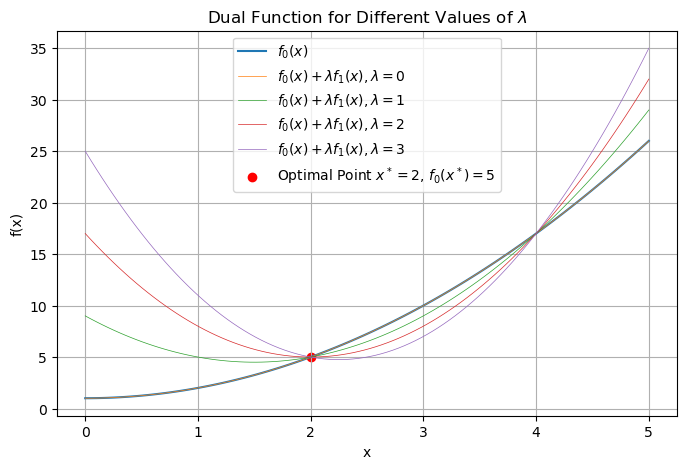

In [3]:
# Plot the dual for a few values of lambda
x = np.linspace(0, 5, 100)
lambdas = [0, 1, 2, 3]
plt.figure(figsize=(8, 5))
plt.plot(x, f0(x), label='$f_0(x)$')
for l in lambdas:
    plt.plot(x, f0(x) + l*f1(x), label=f"$f_0(x) + λ f_1(x), λ = {l}$", linewidth=.5)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot the optimal point
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")
plt.title('Dual Function for Different Values of $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

Notice first the minimum of $L(x, \lambda)$ with respect to $x$ is always less than $p^*$ as the coefficient of $x^2$ is always positive. Notice that the maximum minimum of $L(x, \lambda)$ occurs at $\lambda = 2$. Therefore, we have that $p^* = g(\lambda)$ for $\lambda = 2$.

Notice moreover that whenever $\lambda \leq -1$ then the function is unbounded below. Therefore, we will consider the cases where $\lambda$ is above and below $-1$ separately. When $\lambda > -1$, we have that the minimum of $L(x, \lambda)$ is given by
$\begin{align}
g(\lambda) & = \min_{x} L(x, \lambda) \\
& = \min_{x} (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda) \\
\end{align}$
Taking the derivative with respect to $x$ and setting it equal to zero, we have that
$\begin{align}
\frac{dL(x, \lambda)}{dx} & = 2(1 + \lambda)x - 6\lambda = 0 \\
\end{align}$
Solving for $x$, we have that
$\begin{align}
x & = \frac{3\lambda}{1 + \lambda}
\end{align}$
Plugging this into $L(x, \lambda)$, we have that
$\begin{align}
g(\lambda) & = (1 + \lambda)\left(\frac{3\lambda}{1 + \lambda}\right)^2 - 6\lambda\left(\frac{3\lambda}{1 + \lambda}\right) + (1 + 8 \lambda) \\
& = \frac{9\lambda^2}{(1 + \lambda)} - \frac{18\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
& = \frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
\end{align}$

When $\lambda \leq -1$, we have that the minimum of $L(x, \lambda)$ is given by $-\infty$. Therefore, our function will be given by 
$\begin{align}
g(\lambda) & = \begin{cases}
\frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) & \text{if } \lambda > -1 \\
-\infty & \text{if } \lambda \leq -1
\end{cases}
\end{align}$
We will plot that function below.

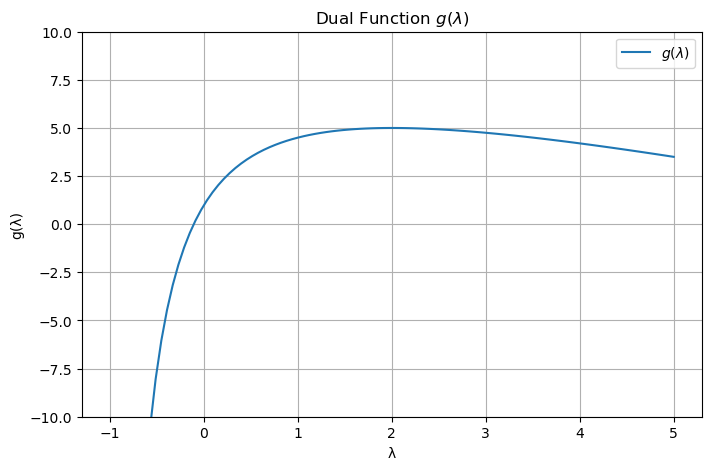

In [13]:
# plot the dual function in lambda
def dual_function(lam):
    return (-9*(lam**2)) / (1 + lam) + (1 + 8 * lam)

lambdas = np.linspace(-0.99999, 5, 100)
plt.figure(figsize=(8, 5))
plt.plot(lambdas, dual_function(lambdas), label='$g(λ)$')
plt.xlabel('λ')
plt.ylabel('g(λ)')
plt.title('Dual Function $g(λ)$')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$. Therefore, we have that the maximum of $g(\lambda)$ is given by
$\begin{align}
g(2) & = \frac{-9(2)^2}{(1 + 2)} + (1 + 8 \cdot 2) \\
& = \frac{-9(4)}{3} + (1 + 16) \\
& = -12 + 17 \\
& = 5
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ is given by $5$ and occurs at $\lambda = 2$.

### C
We will well characterize the dual problem. Clearly, the dual problem is 
$\begin{align}
\text{maximize } \:\:\: & \:\:\: \frac{-9\lambda^2}{1 + \lambda} + 8\lambda + 1 \\
\text{subject to } & \:\:\: \lambda \geq 0
\end{align}$
We have already shown concavity of the function, but we will show it again. To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$ with value $p^* = 5$. Thus, strong duality holds.

### D
We will first plot the problem as a function of $u$. 

## Problem 2


## Problem 3
Note that we can use that the dual norm of $\vert\vert \cdot \vert\vert_2$ is $\vert\vert \cdot \vert\vert_2$. As the problem says, we will introduce an equality constraint that $y_i  = A_i \cdot x + b_i$. We will then write out the Lagrangian as
$\begin{align}
L(x, \lambda) & = \frac{1}{2}\vert\vert x - x_0 \vert\vert_2^2 + \sum_{i = 1}^N \lambda_i(y_i - A_i \cdot x - b_i) + \sum_{i = 1}^N \vert\vert y_i\vert\vert_2
\end{align}$

## Problem 4

## Problem 5

In [4]:
def LAD(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor) -> float:
    return torch.sum(torch.abs(y - x @ beta))

def gradient_descent(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor, alpha: float, max_iter: int, epsilon: float = 1e-8) -> torch.Tensor:
    beta = beta.clone()
    for i in range(max_iter):
        beta -= alpha * torch.sign(x.t() @ (x @ beta - y))
        if LAD(y, x, beta) < epsilon:
            break
    return beta

def LAD_gamma(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor, gamma: float) -> float:
    return torch.sum((1/gamma) * torch.log(torch.exp(gamma * (y - x @ beta)) + torch.exp(gamma * (x @ beta - y)))) 

## Problem 6